# K Nearest Neighbours

# Resources Used 
For this project I will be using a k-Nearest Neighbors Jupyter notebook from Kaggle. 
- Link to the notebook: https://www.kaggle.com/code/mmdatainfo/k-nearest-neighbors

- ChatGPT: I found ChatGPT to be useful in this notebook with explaining the RMSE results and how it impacts the model's performance. 

### Fix Append Error 
As of pandas 2.0, append (previously deprecated) was removed. Need to use concat instead. 
- https://stackoverflow.com/questions/75956209/error-dataframe-object-has-no-attribute-append

# Business Understanding
## Classification: Breast Cancer Dataset

**Objective:** Predict whether a breast mass is benign or malignant based on the features from a digitized image of a fine needle aspirate (FNA) of the mass from a breast cancer dataset.

**Success Criteria:** Develop a model with high accuracy in predicting the diagnosis.

## Regression: Diabetes Dataset
**Objective:** Predict the progression of diabetes based on various factors using the diabetes dataset

**Success Criteria:** Achieve the results of a Root Mean Squared Error (RMSE) for the dataset. Having a lower RMSE values indicate more accurate predictions and better overall performance of the regression model. 



# Data Understanding
## Classification: Breast Cancer Dataset 

**Data Collection:** The breast cancer dataset is obtained from the sklearn.datasets module.

**Data Description:** The dataset contains 569 instances and 30 features.

**Data Exploration:** Visualize the dataset using Histograms and a Correlation Heatmap. 

## Regression: Diabetes Datset 
**Data Collection:** The diabetes dataset is obtained from the sklearn.datasets module.

**Data Description:** The dataset contains physiological measurements of 442 diabetes patients, along with a target variable that shows diabetes progression.

**Data Exploration:** Visualise the dataset using Histograms and a Correlation Heatmap


# Data Preperation 

## Classification: Breast Cancer Dataset 

**Data Cleaning:** Since the dataset was taking from `sklearn.datasets` it was already cleaned. 

**Feature Engineering:** The features were scaled using StandardScaler (with mean and standard deviation) to ensure that all features have the same scale. This is important for KNN since it uses Euclidean distance, which is sensitive to the scale of features.
The code has Principal Component Analysis (PCA) to reduce the dimensionality of the dataset while preserving 99% of the variance. This reduces the number of features, which can help in reducing the computational cost and overfitting.

**Train-Test Split:** Split the data into training and testing sets. I used 70% of the data for training and 30% for testing. 

**Cross-Validation:** The code uses 5-fold cross-validation (cv=5) to evaluate the KNN model. This means that the dataset is divided into 5 equal parts, and the model is trained and evaluated 5 times, each time using a different part as the test set and the remaining parts as the training set


## Regression: Diabetes Dataset 

**Data Cleaning:** Since the dataset was taken from sklearn.datasets, it was already cleaned.

**Feature Engineering:** The features were scaled using StandardScaler (with mean and standard deviation) to ensure that all features have the same scale.
The code has Principal Component Analysis (PCA) to reduce the dimensionality of the dataset








# Modelling 
## Classification: Breast Cancer Dataset

**Model Selection:** I chose the K-Nearest Neighbors (KNN) algorithm as the model for classification.

**Model Training:** Trained the chosen model on the training data.

**Model Evaluation:** Evaluated the models performance on the testing data using accuracy scoreand a classification report. 

## Regression: Diabetes Dataset 

**Model Selection:** I also chose the K-Nearest Neighbours (KNN) algorithm as the model for regression. 

**Model Training:** Trained the chosen model on the training data.


# Evaluation 

## Classification: Breast Cancer Dataset 

**Model Performance:** The model's performance was evaluated using the accuracy score, classification report. The accuracy score for the model depended on the parameters used

 First Set (n_neighbors = [1,3,5]):
- Train Accuracy: 0.97
- Test Accuracy: 0.96


Second Set (n_neighbors = [2,4,6]):
- Train Accuracy: 1.00
- Test Accuracy: 0.96

The second set has a higher train accuracy, which could indicate that the model is overfitting to the training data. However the test accuracy remains the same for both sets.

## Regression: Diabetes Dataset 

**Model Performance:** The performance of the model was evaluated using the Root Mean Squared Error (RMSE) metric.

**KNN Regression RMSE:**
Original Parameters (train_size=0.67, test_size=0.33): 5956 *1000$

Adjusted Parameters (train_size=0.70, test_size=0.30): 5907 *1000$

The RMSE values indicate the average difference between the predicted values generated by the KNN regressor and the actual values in the test dataset. Lower RMSE values suggest better performance, the adjusted parameters resulted in a slightly lower RMSE, which means there was a slightly better performance of the model on the testing set.

**Dummy Regressor (Mean and Median) RMSE:**
Original Parameters (train_size=0.67, test_size=0.33):
Mean: 7727 *1000$
Median: 7750 *1000$

Adjusted Parameters (train_size=0.70, test_size=0.30):
Mean: 7682 *1000$
Median: 7798 *1000$

The RMSE values for the Dummy Regressor remained mostly unchanged with the adjusted parameters, indicating that the change in data split didn't significantly affect the performance of the models.


# Changes Made To Notebook 

I started with setting up the environment with imports from the K Nearest Neighbors Notebook. 

In [2]:
# Scikit-learn
from sklearn import datasets
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier,KNeighborsRegressor
from sklearn.dummy import DummyClassifier, DummyRegressor
from sklearn.metrics import classification_report, mean_squared_error
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA
# other libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
# Use vector drawing inside jupyter notebook
%config InlineBackend.figure_format = "svg"
# Set matplotlib default axis font size (inside this notebook)
plt.rcParams.update({'font.size': 8})

# Classification: Using K Nearest Neighbour On A Breast Cancer Dataset

I loaded in the Breast Cancer Wisconsin (Diagnostic) Data Set from sklearn datasets. This dataset contains features computed from a digitized image of a fine needle aspirate (FNA) of a breast mass. The features describe characteristics of the cell nuclei present in the image. The goal is to predict whether a breast mass is benign (non-cancerous) or malignant (cancerous) based on these features.

In [4]:
import pandas as pd
from sklearn.datasets import load_breast_cancer

# Load the breast cancer dataset
breast_cancer = load_breast_cancer()

# Create a DataFrame from the dataset
df = pd.DataFrame(breast_cancer.data, columns=breast_cancer.feature_names)
df['target'] = breast_cancer.target

# Display the first few rows of the DataFrame
print(df.head())


   mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990          0.1974              0.12790         0.2069   
3           0.28390          0.2414              0.10520         0.2597   
4           0.13280          0.1980              0.10430         0.1809   

   mean fractal dimension  ...  worst texture  worst perimeter  worst area  \
0             

I had to change append to concat as of pandas 2.0, append (previously deprecated) was removed. 
The code below shows information of the breast cancer data sets such as its datatypes and it includes the count of non values using the isna() method and count indicates that each column has 569 non-null values

In [5]:
# Compute selected stats
dfinfo = pd.DataFrame(df.dtypes, columns=["dtypes"])
for (m, n) in zip([df.count(), df.isna().sum()], ["count", "isna"]):
    dfinfo = dfinfo.merge(pd.DataFrame(m, columns=[n]), right_index=True, left_index=True, how="inner")

# Transpose dfinfo and append df.describe()
dfinfo = pd.concat([dfinfo.T, df.describe().T])

print(dfinfo)

                        mean radius mean texture mean perimeter mean area  \
dtypes                      float64      float64        float64   float64   
count                           569          569            569       569   
isna                              0            0              0         0   
mean radius                     NaN          NaN            NaN       NaN   
mean texture                    NaN          NaN            NaN       NaN   
mean perimeter                  NaN          NaN            NaN       NaN   
mean area                       NaN          NaN            NaN       NaN   
mean smoothness                 NaN          NaN            NaN       NaN   
mean compactness                NaN          NaN            NaN       NaN   
mean concavity                  NaN          NaN            NaN       NaN   
mean concave points             NaN          NaN            NaN       NaN   
mean symmetry                   NaN          NaN            NaN       NaN   

I changed the figure size to 20x15 so that the plot is more readable as the default size is too small.

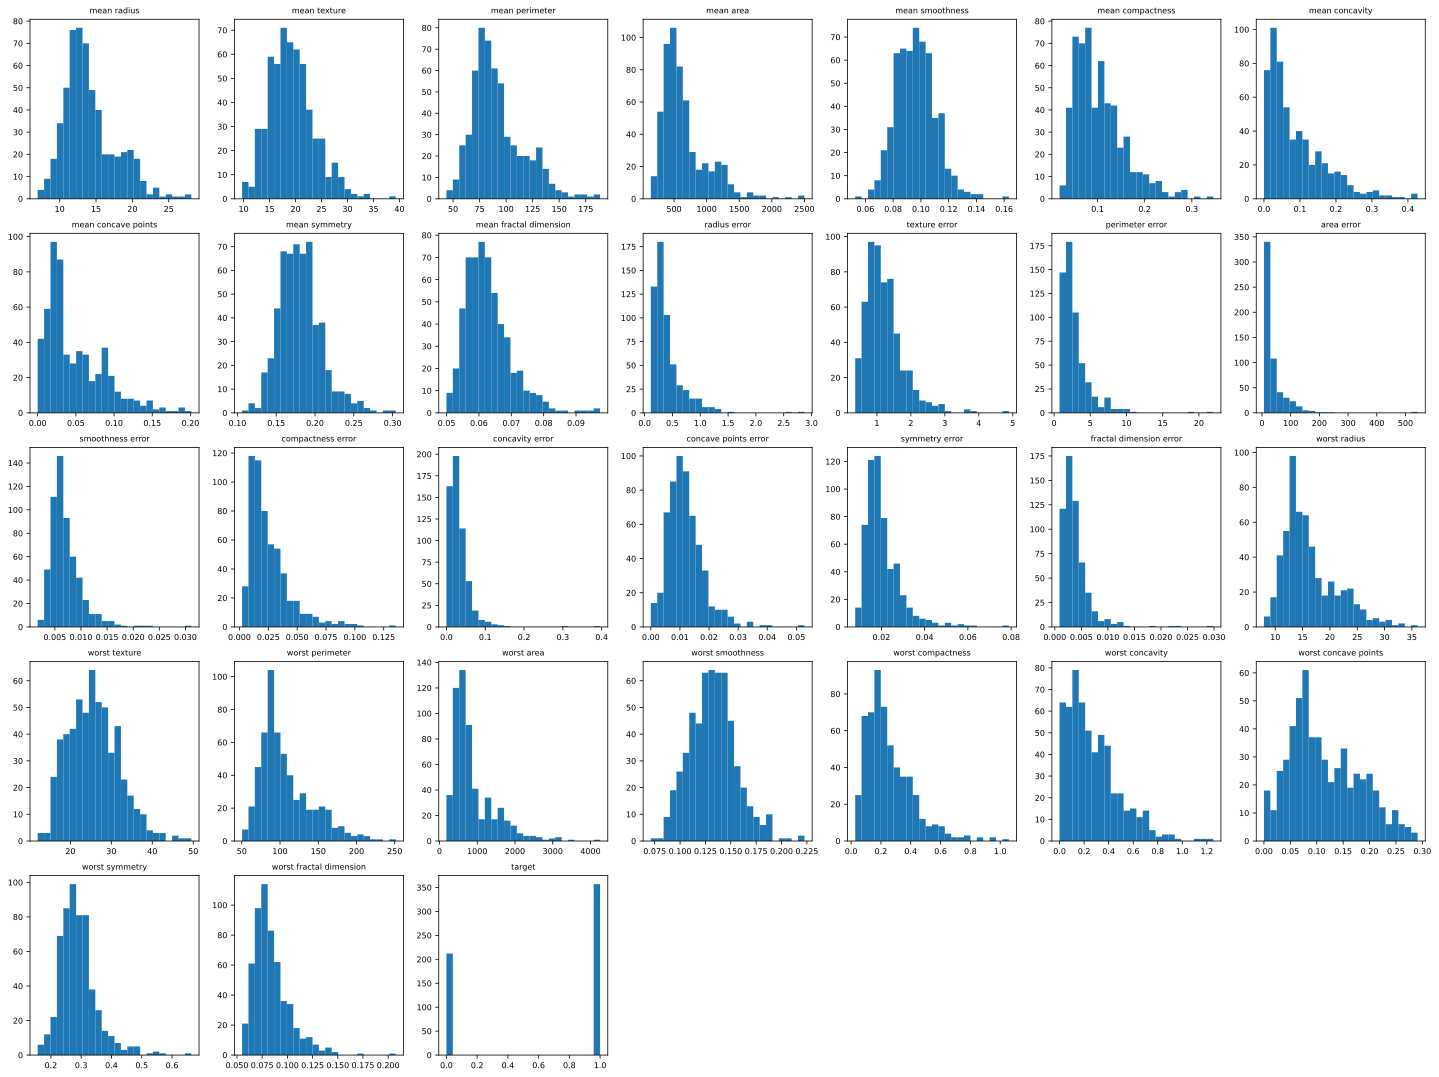

In [6]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets import load_breast_cancer

# Load the breast cancer dataset
breast_cancer = load_breast_cancer()

# Create a DataFrame from the dataset
df = pd.DataFrame(breast_cancer.data, columns=breast_cancer.feature_names)
df['target'] = breast_cancer.target

# Plot histograms for each column
plt.figure(figsize=(20, 15))
for i, v in enumerate(df.columns):
    plt.subplot(5, 7, i + 1)
    plt.hist(df.iloc[:, i], bins='sqrt')
    plt.title(df.columns[i], fontsize=8)

plt.tight_layout()
plt.show()


I changed the colour map to be "coolwarm".

In [7]:
df.corr().round(2).style.background_gradient(cmap="coolwarm")

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
mean radius,1.000000,0.320000,1.000000,0.990000,0.170000,0.510000,0.680000,0.820000,0.150000,-0.310000,0.680000,-0.100000,0.670000,0.740000,-0.220000,0.210000,0.190000,0.380000,-0.100000,-0.040000,0.970000,0.300000,0.970000,0.940000,0.120000,0.410000,0.530000,0.740000,0.160000,0.010000,-0.730000
mean texture,0.320000,1.000000,0.330000,0.320000,-0.020000,0.240000,0.300000,0.290000,0.070000,-0.080000,0.280000,0.390000,0.280000,0.260000,0.010000,0.190000,0.140000,0.160000,0.010000,0.050000,0.350000,0.910000,0.360000,0.340000,0.080000,0.280000,0.300000,0.300000,0.110000,0.120000,-0.420000
mean perimeter,1.000000,0.330000,1.000000,0.990000,0.210000,0.560000,0.720000,0.850000,0.180000,-0.260000,0.690000,-0.090000,0.690000,0.740000,-0.200000,0.250000,0.230000,0.410000,-0.080000,-0.010000,0.970000,0.300000,0.970000,0.940000,0.150000,0.460000,0.560000,0.770000,0.190000,0.050000,-0.740000
mean area,0.990000,0.320000,0.990000,1.000000,0.180000,0.500000,0.690000,0.820000,0.150000,-0.280000,0.730000,-0.070000,0.730000,0.800000,-0.170000,0.210000,0.210000,0.370000,-0.070000,-0.020000,0.960000,0.290000,0.960000,0.960000,0.120000,0.390000,0.510000,0.720000,0.140000,0.000000,-0.710000
mean smoothness,0.170000,-0.020000,0.210000,0.180000,1.000000,0.660000,0.520000,0.550000,0.560000,0.580000,0.300000,0.070000,0.300000,0.250000,0.330000,0.320000,0.250000,0.380000,0.200000,0.280000,0.210000,0.040000,0.240000,0.210000,0.810000,0.470000,0.430000,0.500000,0.390000,0.500000,-0.360000
mean compactness,0.510000,0.240000,0.560000,0.500000,0.660000,1.000000,0.880000,0.830000,0.600000,0.570000,0.500000,0.050000,0.550000,0.460000,0.140000,0.740000,0.570000,0.640000,0.230000,0.510000,0.540000,0.250000,0.590000,0.510000,0.570000,0.870000,0.820000,0.820000,0.510000,0.690000,-0.600000
mean concavity,0.680000,0.300000,0.720000,0.690000,0.520000,0.880000,1.000000,0.920000,0.500000,0.340000,0.630000,0.080000,0.660000,0.620000,0.100000,0.670000,0.690000,0.680000,0.180000,0.450000,0.690000,0.300000,0.730000,0.680000,0.450000,0.750000,0.880000,0.860000,0.410000,0.510000,-0.700000
mean concave points,0.820000,0.290000,0.850000,0.820000,0.550000,0.830000,0.920000,1.000000,0.460000,0.170000,0.700000,0.020000,0.710000,0.690000,0.030000,0.490000,0.440000,0.620000,0.100000,0.260000,0.830000,0.290000,0.860000,0.810000,0.450000,0.670000,0.750000,0.910000,0.380000,0.370000,-0.780000
mean symmetry,0.150000,0.070000,0.180000,0.150000,0.560000,0.600000,0.500000,0.460000,1.000000,0.480000,0.300000,0.130000,0.310000,0.220000,0.190000,0.420000,0.340000,0.390000,0.450000,0.330000,0.190000,0.090000,0.220000,0.180000,0.430000,0.470000,0.430000,0.430000,0.700000,0.440000,-0.330000
mean fractal dimension,-0.310000,-0.080000,-0.260000,-0.280000,0.580000,0.570000,0.340000,0.170000,0.480000,1.000000,0.000000,0.160000,0.040000,-0.090000,0.400000,0.560000,0.450000,0.340000,0.350000,0.690000,-0.250000,-0.050000,-0.210000,-0.230000,0.500000,0.460000,0.350000,0.180000,0.330000,0.770000,0.010000


In [8]:
scale = StandardScaler(with_mean=True,with_std=True);
Xo = scale.fit_transform(df.drop(["target"],axis=1).values);

I decided to keep the n_components=0.99 to keep 99% of the variance. This is might be good practice to avoid overfitting and to reduce the number of features as PCA reduces the number of features in a dataset while preserving the most important information.

In [9]:
pca = PCA(n_components=0.99)# or set n_components="mle"
X = pca.fit_transform(Xo)
print("Nr. of features after PCA = {} (input = {})".format(X.shape[1],Xo.shape[1]))

Nr. of features after PCA = 17 (input = 30)


I split the data into training and test sets. I chose to use 70% of the data for training and 30% for testing. I also set the random_state parameter to 42 to ensure reproducibility.

In [10]:
# encode target values (is not necessary for IRIS but still:-)
y = LabelEncoder().fit_transform(df["target"].values);
# Split 2/3 to 1/3 train to test respectively
[X_train,X_test,y_train,y_test] = train_test_split(X,y,train_size = 0.70,test_size = 0.30,
                                                   stratify=y,random_state=42);

I kept cv = 5 (specifes the numner of folds in the cross-validation-part) as it will split the data into 5 parts and use 4 parts for training and 1 part for testing ( during each iteration of the cross-validation process, 4 parts of the dataset will be used for training the model, and 1 part will be used for testing the model.). 
I also kept the scoring parameter as "accuracy" as it will return the accuracy of the model. 
I changed n_neighbours to 2,4 and 6 to see which one gives the best accuracy. The classifier will look at the labels of the 2, 4, or 6 nearest neighbors to the test instance and use a majority vote to determine the class label of the test instance.

In [11]:
model = KNeighborsClassifier(algorithm="auto");
parameters = {"n_neighbors":[1,3,5],
              "weights":["uniform","distance"]}
model_optim = GridSearchCV(model, parameters, cv=5,scoring="accuracy");

In [12]:
model_optim.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [1, 3, 5],
                         'weights': ['uniform', 'distance']},
             scoring='accuracy')

In [13]:
model_optim.best_estimator_

KNeighborsClassifier()

In [14]:
for (i,x,y) in zip(["Train","Test"],[X_train,X_test],[y_train,y_test]):
    print("Classification kNN",i," report:\n",classification_report(y,model_optim.predict(x)))

Classification kNN Train  report:
               precision    recall  f1-score   support

           0       0.99      0.93      0.96       148
           1       0.96      0.99      0.98       250

    accuracy                           0.97       398
   macro avg       0.97      0.96      0.97       398
weighted avg       0.97      0.97      0.97       398

Classification kNN Test  report:
               precision    recall  f1-score   support

           0       0.98      0.92      0.95        64
           1       0.95      0.99      0.97       107

    accuracy                           0.96       171
   macro avg       0.97      0.96      0.96       171
weighted avg       0.97      0.96      0.96       171



In [15]:
model = KNeighborsClassifier(algorithm="auto");
parameters = {"n_neighbors":[2,4,6],
              "weights":["uniform","distance"]}
model_optim = GridSearchCV(model, parameters, cv=5,scoring="accuracy")

model_optim.fit(X_train,y_train)

for (i,x,y) in zip(["Train","Test"],[X_train,X_test],[y_train,y_test]):
    print("Classification kNN",i," report:\n",classification_report(y,model_optim.predict(x)))

Classification kNN Train  report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       148
           1       1.00      1.00      1.00       250

    accuracy                           1.00       398
   macro avg       1.00      1.00      1.00       398
weighted avg       1.00      1.00      1.00       398

Classification kNN Test  report:
               precision    recall  f1-score   support

           0       0.97      0.94      0.95        64
           1       0.96      0.98      0.97       107

    accuracy                           0.96       171
   macro avg       0.97      0.96      0.96       171
weighted avg       0.96      0.96      0.96       171



The second set of results, where n_neighbors was set to [2,4,6], seems to have performed better based on the accuracy scores.

First Set (n_neighbors = [1,3,5]):
- Train Accuracy: 0.97
- Test Accuracy: 0.96


Second Set (n_neighbors = [2,4,6]):
- Train Accuracy: 1.00
- Test Accuracy: 0.96

The second set has a higher train accuracy, which could indicate that the model is overfitting to the training data. However, the test accuracy remains the same for both sets.

A model with a train accuracy of 1.00 might be a cause for concern as it suggests the model might be overfitting to the training data. However, in this case, since the test accuracy is the same for both sets, which means its harder to determine which set of paramaters is better. The difference in accuracy is relatively small so the choice of using the first set or second set might not impact my model's performance too much. 

For now I will stick with the First Set. 

# Regression: Using K Nearest Neighbour On A Diabetes Dataset

I loaded in the Diabetes Data Set from sklearn datasets. This dataset contains data that is related to diabetic patiens and includes variables such as age, body mass Index (BMI), blood pressure and six blood serum measurements. 

In [16]:
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import pandas as pd

# Load the diabetes dataset
diabetes_data = load_diabetes()

# Create a DataFrame from the feature data
df = pd.DataFrame(diabetes_data.data, columns=diabetes_data.feature_names)

# Add the target column to the DataFrame
df['target'] = diabetes_data.target

# Compute selected stats
dfinfo = pd.DataFrame(df.dtypes,columns=["dtypes"])
for (m,n) in zip([df.count(),df.isna().sum()],["count","isna"]):
    dfinfo = pd.concat([dfinfo, pd.DataFrame(m,columns=[n])], axis=1)

# Add to `describe` output
dfinfo = pd.concat([dfinfo.T, df.describe().T])


In [17]:
df

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0
...,...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207,178.0
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018114,0.044485,104.0
439,0.041708,0.050680,-0.015906,0.017293,-0.037344,-0.013840,-0.024993,-0.011080,-0.046883,0.015491,132.0
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044529,-0.025930,220.0


I increased the number of columns in the subplot grid. 

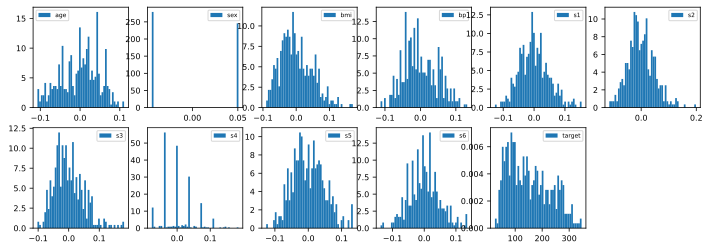

In [18]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,4))  
for (i,v) in enumerate(df.columns):
    plt.subplot(2,6,i+1);  # Change the number of columns to 6
    plt.hist(df.iloc[:,i],50,density=True)
    plt.legend([df.columns[i]],fontsize=6)


I changed the colour map to be "summer".

In [29]:
df.corr().round(2).style.background_gradient(cmap="summer")

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
age,1.000000,0.170000,0.190000,0.340000,0.260000,0.220000,-0.080000,0.200000,0.270000,0.300000,0.190000
sex,0.170000,1.000000,0.090000,0.240000,0.040000,0.140000,-0.380000,0.330000,0.150000,0.210000,0.040000
bmi,0.190000,0.090000,1.000000,0.400000,0.250000,0.260000,-0.370000,0.410000,0.450000,0.390000,0.590000
bp,0.340000,0.240000,0.400000,1.000000,0.240000,0.190000,-0.180000,0.260000,0.390000,0.390000,0.440000
s1,0.260000,0.040000,0.250000,0.240000,1.000000,0.900000,0.050000,0.540000,0.520000,0.330000,0.210000
s2,0.220000,0.140000,0.260000,0.190000,0.900000,1.000000,-0.200000,0.660000,0.320000,0.290000,0.170000
s3,-0.080000,-0.380000,-0.370000,-0.180000,0.050000,-0.200000,1.000000,-0.740000,-0.400000,-0.270000,-0.390000
s4,0.200000,0.330000,0.410000,0.260000,0.540000,0.660000,-0.740000,1.000000,0.620000,0.420000,0.430000
s5,0.270000,0.150000,0.450000,0.390000,0.520000,0.320000,-0.400000,0.620000,1.000000,0.460000,0.570000
s6,0.300000,0.210000,0.390000,0.390000,0.330000,0.290000,-0.270000,0.420000,0.460000,1.000000,0.380000


I dont see any columns I should drop based on the correlation map. 

In [20]:
from sklearn.preprocessing import StandardScaler

X = StandardScaler().fit_transform(df.drop("target",axis=1).values)
y = df.target.values


In [21]:
from sklearn.decomposition import PCA

X = PCA(n_components="mle").fit_transform(X)
print("Nr. of features after reduction = {} (input = {})".format(X.shape[1],df.shape[1]))

Nr. of features after reduction = 9 (input = 11)


In [22]:
[X_train,X_test,y_train,y_test] = train_test_split(X,y,train_size=0.67,test_size=0.33,
                                                   random_state=123);

In [23]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV

knn = KNeighborsRegressor();
parameters = {"n_neighbors":[1,3,5,7,9],
              "weights":["uniform","distance"]}
knn_reg = GridSearchCV(knn, parameters, cv=5, scoring="neg_mean_squared_error");

In [24]:
knn_reg.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=KNeighborsRegressor(),
             param_grid={'n_neighbors': [1, 3, 5, 7, 9],
                         'weights': ['uniform', 'distance']},
             scoring='neg_mean_squared_error')

In [25]:
knn_reg.best_estimator_

KNeighborsRegressor(n_neighbors=7, weights='distance')

### Disclaimer: 
Im leaving the below explanation in on how RMSE works as this was the most confusing part of the notebook for me to understand. The below explanation is generated from ChatGPT and I did find it helpful in my understanding of RMSE.

The code below calculates the root mean squared error (RMSE) of the KNN regressor's predictions on the test data, and multiplies the result by 1000 to express the error in terms of thousands of units.

RMSE measures how much the predicted values differ from the actual values, and in this case, it is scaled up by 1000. So, in simpler terms, it means that, on average, the KNN regressor's predictions are off by approximately 5,907 units, which means that the average difference between the predicted values generated by the KNN regressor and the actual values (ground truth) in the test dataset is approximately 5,907 units. In other words, the model's predictions, on average, deviate from the actual values by about 5,907 units

This deviation gives you an idea of how well the model performs in terms of accurately predicting the target variable. Lower RMSE values indicate that the model's predictions are closer to the actual values, while higher RMSE values indicate larger deviations and potentially poorer performance.


Regression kNN (test) RMSE = 5907 * 1000$:

This line tells us about the performance of a kNN regression model on the test data.
The RMSE (Root Mean Squared Error) value is 5907 * 1000$.
RMSE measures the average difference between the predicted values and the actual values.
So, on average, the model's predictions deviate from the actual values by approximately 5907 units.

In [26]:
import numpy as np

print("Regression kNN (test) RMSE \t= {:.0f} *1000$".format(
    100*np.sqrt(mean_squared_error(knn_reg.predict(X_test),y_test))))


Regression kNN (test) RMSE 	= 5907 *1000$


Regression mean (test) RMSE = 7682 * 1000$:

This line shows the performance of a dummy regression model that predicts the mean of the training set for all test instances.
The RMSE value for this model is 7682 * 1000$.
It means that the dummy model's predictions, on average, deviate from the actual values by approximately 7682 units.
Regression median (test) RMSE = 7798 * 1000$:

This line displays the performance of a dummy regression model that predicts the median of the training set for all test instances.
The RMSE value for this model is 7798 * 1000$.
Similarly, it means that the dummy model's predictions, on average, deviate from the actual values by approximately 7798 units.

In [27]:
from sklearn.dummy import DummyRegressor

for i in ["mean","median"]:
    dummy = DummyRegressor(strategy=i).fit(X_train,y_train);
    print("Regression ",i,"(test) RMSE \t= {:.0f} *1000$".format(
        100*np.sqrt(mean_squared_error(y_test,dummy.predict(X_test)))))


Regression  mean (test) RMSE 	= 7682 *1000$
Regression  median (test) RMSE 	= 7798 *1000$


The model's predictions tend to deviate from the actual values by about 5,907 units. 

I decided to change the parameters of 'train_size' and 'test_size' to see if it makes a difference. I increased the training size to 70% and decreased the testing size to 30%. This adjustment resulted in a slightly lower RMSE for the kNN regression model, while the RMSE for the mean and median strategies of the Dummy Regressor remained relatively unchanged compared to the previous split.

In [31]:
[X_train,X_test,y_train,y_test] = train_test_split(X,y,train_size=0.70,test_size=0.30,
                                                   random_state=123);


knn_reg.fit(X_train,y_train)

knn_reg.best_estimator_

print("Regression kNN (test) RMSE \t= {:.0f} *1000$".format(
    100*np.sqrt(mean_squared_error(knn_reg.predict(X_test),y_test))))

for i in ["mean","median"]:
    dummy = DummyRegressor(strategy=i).fit(X_train,y_train);
    print("Regression ",i,"(test) RMSE \t= {:.0f} *1000$".format(
        100*np.sqrt(mean_squared_error(y_test,dummy.predict(X_test)))))



Regression kNN (test) RMSE 	= 5956 *1000$
Regression  mean (test) RMSE 	= 7727 *1000$
Regression  median (test) RMSE 	= 7750 *1000$
